# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.3
    Uninstalling pydantic-2.11.3:
      Successfully uninstalled pydantic-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires scipy>=1.10.0, which is not installed.
fastai 2.7.19 requires scipy, which is not installed.

## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
# spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
# Import the first file - True.csv
true_news_df = pd.read_csv('/content/True.csv')

# Import the second file - Fake.csv
fake_news_df = pd.read_csv('/content/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
true_news_df.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [ ]:
true_news_df.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text                date  
count                                               21417               21417  
unique                                              21192                 716  
top     (Reuters) - Highlights for U.S. President Dona...  December 20, 2017   
freq                                                    8                 182

In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [ ]:
fake_news_df.describe()

title   text          date
count                                               23502  23502         23481
unique                                              17914  17466          1692
top     MEDIA IGNORES Time That Bill Clinton FIRED His...         May 10, 2017
freq                                                    6    626            46

In [ ]:
# Print the column details for True News DataFrame
true_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [ ]:
# Print the column details for Fake News Dataframe
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [ ]:
# Print the column names of both DataFrames
print("Column names of true_news_df:", true_news_df.columns)
print("Column names of fake_news_df:", fake_news_df.columns)

Column names of true_news_df: Index(['title', 'text', 'date'], dtype='object')
Column names of fake_news_df: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
combined_df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [ ]:
# Handle Rows with Null Values
combined_df.dropna(inplace=True)
combined_df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(['title', 'text'], axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head()

date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                           news_text  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(text):
    """
    Cleans the input text by converting to lowercase, removing text in square brackets,
    removing punctuation, and removing words containing numbers.
    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = combined_df['news_text'].apply(clean_text)

In [ ]:
df_clean.head()

news_label                                       cleaned_text
0           1  as us budget fight looms republicans flip thei...
1           1  us military to accept transgender recruits on ...
2           1  senior us republican senator let mr mueller do...
3           1  fbi russia probe helped by australian diplomat...
4           1  trump wants postal service to charge much more...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


def lemmatize_text(text):
    """
    Lemmatizes the input text using spaCy and keeps only nouns (NN and NNS tags).

    Args:
        text (str): The input text to be lemmatized.

    Returns:
        str: The lemmatized text containing only nouns.
    """
    doc = nlp(text)  # Process the text with spaCy
    lemmatized_text = " ".join([token.lemma_ for token in doc if token.tag_ in ('NN', 'NNS') and token.text not in stopwords.words('english')])
    return lemmatized_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(lemmatize_text)

100%|██████████| 44898/44898 [1:02:16<00:00, 12.01it/s]


### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("/content/clean_df.csv", index=False)
df_clean = pd.read_csv("/content/clean_df.csv")

In [ ]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label                                       cleaned_text  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   
3           1  fbi russia probe helped by australian diplomat...   
4           1  trump wants postal service to charge much more...   

                                     lemmatized_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...

In [ ]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [ ]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44898 non-null  object
 2   lemmatized_text  44882 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_text_len'] = train_df['cleaned_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')  # Replace NaN with empty string
train_df['lemmatized_text_len'] = train_df['lemmatized_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

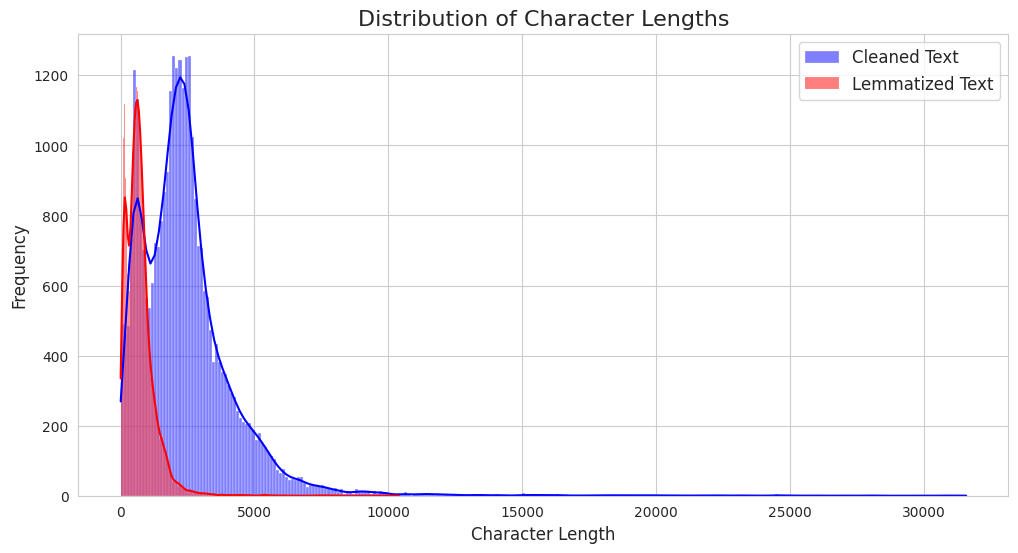

In [ ]:
# Create a histogram plot to visualise character lengths
sns.set_style('whitegrid')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_text_len'], ax=ax, label='Cleaned Text', color='blue', kde=True)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['lemmatized_text_len'], ax=ax, label='Lemmatized Text', color='red', kde=True)

# Set the title and labels
ax.set_title('Distribution of Character Lengths', fontsize=16)
ax.set_xlabel('Character Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add a legend
ax.legend(fontsize=12)

# Display the plot
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

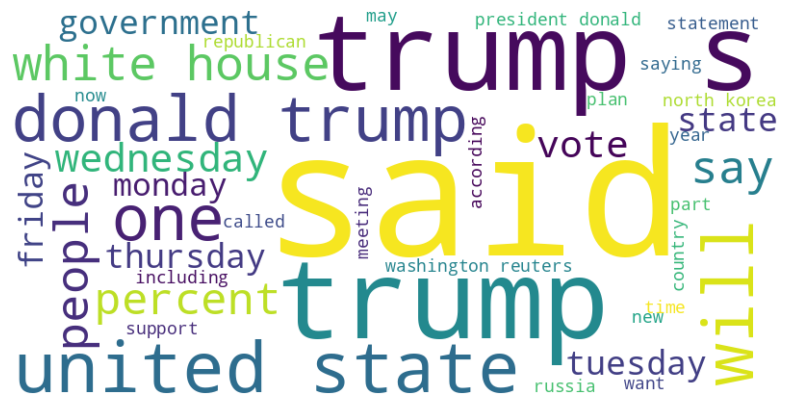

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud, STOPWORDS

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = train_df[train_df['news_label'] == 1]['cleaned_text']
true_news_text = true_news_text.astype(str).str.cat(sep=' ') #Convert to string and handle non-string values

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      max_words=40).generate(true_news_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

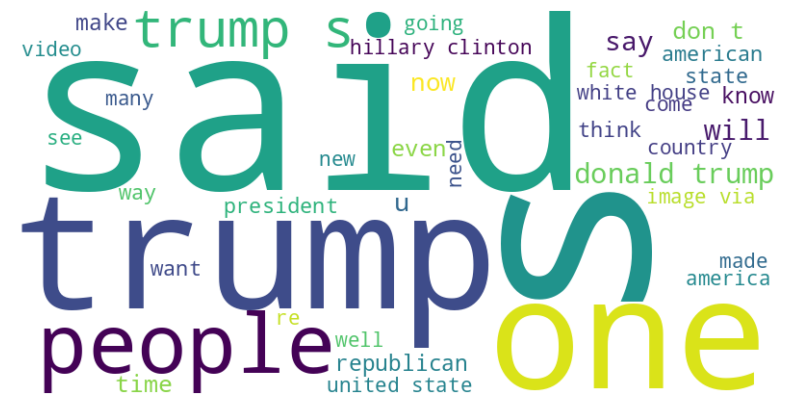

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = train_df[train_df['news_label'] == 0]['cleaned_text']
fake_news_text = fake_news_text.astype(str).str.cat(sep=' ') # Convert to string and handle non-string values

# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      max_words=40).generate(fake_news_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n, top_k):
    """
    Extracts the top k most frequent n-grams from a corpus of text.

    Args:
        corpus (list): A list of text documents.
        n (int): The n-gram size (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
        top_k (int): The number of top n-grams to return.

    Returns:
        list: A list of tuples, where each tuple contains an n-gram and its frequency.
    """
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)  # Create CountVectorizer object
    bag_of_words = vec.transform(corpus)  # Transform corpus into bag-of-words
    sum_words = bag_of_words.sum(axis=0)  # Sum word frequencies across documents
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # Get word frequencies
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)  # Sort by frequency
    return words_freq[:top_k]  # Return top k n-grams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data
train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
the: 335761
to: 176238
of: 144647
in: 128832
and: 127189
on: 78036
said: 68805
that: 61759
for: 57390
trump: 40732


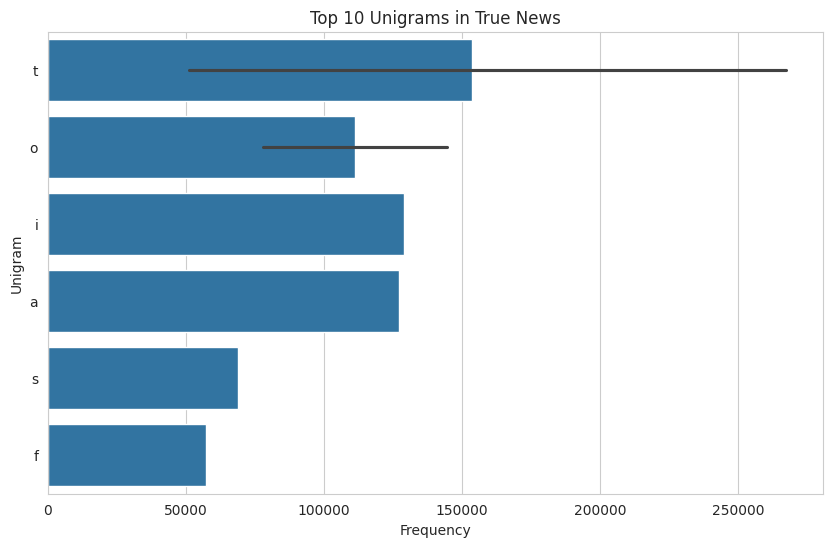

In [ ]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Filter true news for cleaned text
true_news_texts = train_df[train_df['news_label'] == 1]['cleaned_text'].fillna("").tolist()

# Get top 10 unigrams using the get_top_ngrams function
top_10_unigrams = get_top_ngrams(true_news_texts, 1, 10)

# Print the top 10 unigrams
print("Top 10 Unigrams in True News:")
for unigram, frequency in top_10_unigrams:
    print(f"{unigram}: {frequency}")

# Prepare data for plotting
unigrams = [unigram[0] for unigram, frequency in top_10_unigrams]
frequencies = [frequency for unigram, frequency in top_10_unigrams]

# Plot the top 10 unigrams as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=unigrams)
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
of the: 33418
in the: 29006
to the: 15527
on the: 11674
for the: 10772
the united: 9970
said the: 8609
the us: 8606
united states: 8594
and the: 8585


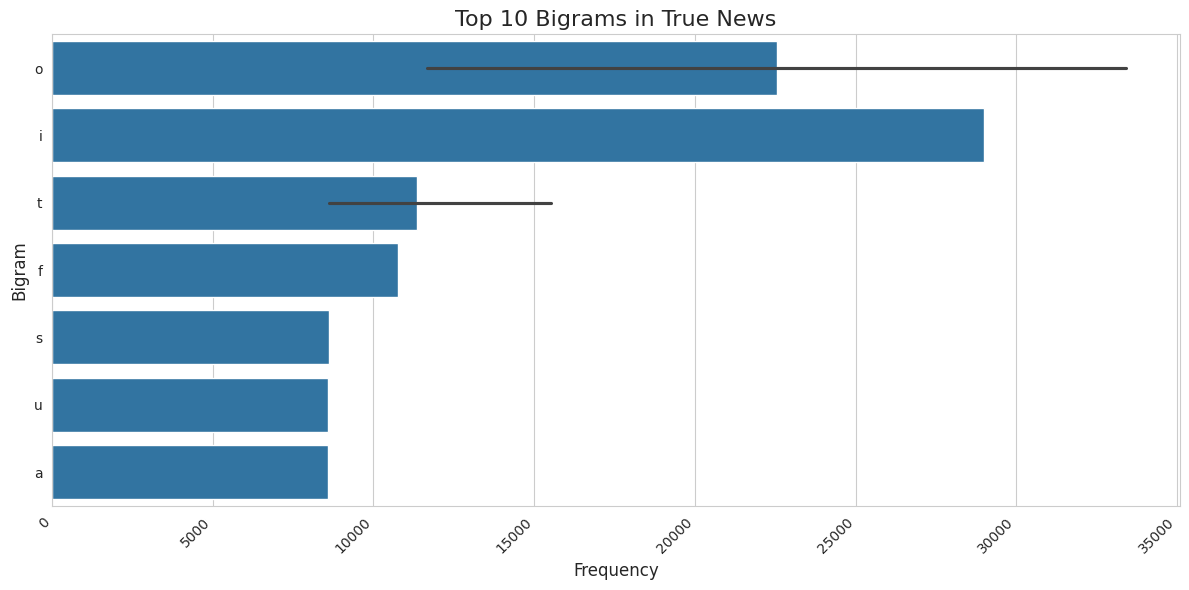

In [ ]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Get top 10 bigrams using the get_top_ngrams function
top_10_bigrams = get_top_ngrams(true_news_texts, 2, 10)

# Print the top 10 bigrams
print("Top 10 Bigrams in True News:")
for bigram, frequency in top_10_bigrams:
    print(f"{bigram}: {frequency}")

# Prepare data for plotting
bigrams = [bigram[0] for bigram, frequency in top_10_bigrams]  # Extract bigrams for y-axis
frequencies = [frequency for bigram, frequency in top_10_bigrams]  # Extract frequencies for x-axis

# Create the bar plot
plt.figure(figsize=(12, 6))  # Set figure size for better readability
sns.barplot(x=frequencies, y=bigrams)  # Create the bar plot with seaborn
plt.title('Top 10 Bigrams in True News', fontsize=16)  # Set title with fontsize
plt.xlabel('Frequency', fontsize=12)  # Set x-axis label with fontsize
plt.ylabel('Bigram', fontsize=12)  # Set y-axis label with fontsize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plot

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
the united states: 8393
president donald trump: 4065
the white house: 3654
said in statement: 2651
president barack obama: 2014
one of the: 1966
us president donald: 1763
house of representatives: 1578
secretary of state: 1570
as well as: 1348


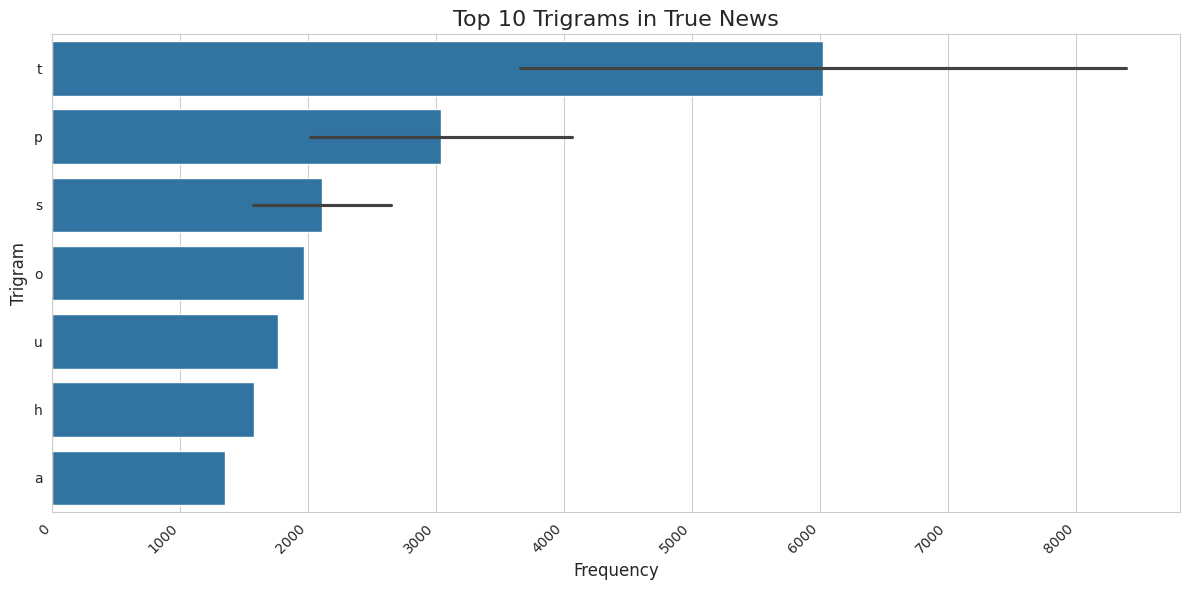

In [ ]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Get top 10 trigrams using the get_top_ngrams function
top_10_trigrams = get_top_ngrams(true_news_texts, 3, 10)

# Print the top 10 trigrams
print("Top 10 Trigrams in True News:")
for trigram, frequency in top_10_trigrams:
    print(f"{trigram}: {frequency}")

# Prepare data for plotting
trigrams = [trigram[0] for trigram, frequency in top_10_trigrams]  # Extract trigrams for y-axis
frequencies = [frequency for trigram, frequency in top_10_trigrams]  # Extract frequencies for x-axis

# Create the bar plot
plt.figure(figsize=(12, 6))  # Set figure size for better readability
sns.barplot(x=frequencies, y=trigrams)  # Create the bar plot with seaborn
plt.title('Top 10 Trigrams in True News', fontsize=16)  # Set title with fontsize
plt.xlabel('Frequency', fontsize=12)  # Set x-axis label with fontsize
plt.ylabel('Trigram', fontsize=12)  # Set y-axis label with fontsize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plot

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
the: 366809
to: 207013
of: 165294
and: 157310
in: 116795
that: 104142
is: 78437
for: 66917
on: 58737
trump: 57553


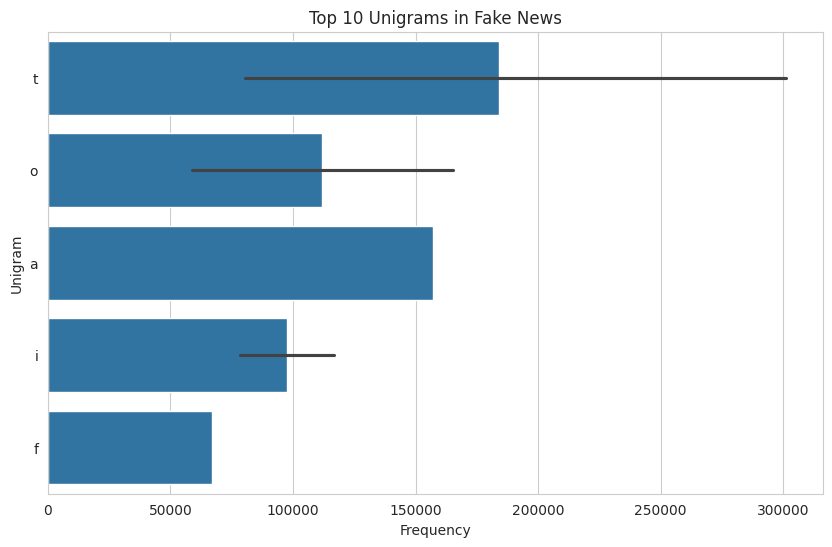

In [ ]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# Filter fake news for cleaned text
fake_news_texts = train_df[train_df['news_label'] == 0]['cleaned_text'].fillna("").tolist()

# Get top 10 unigrams using the get_top_ngrams function
top_10_unigrams_fake = get_top_ngrams(fake_news_texts, 1, 10)

# Print the top 10 unigrams
print("Top 10 Unigrams in Fake News:")
for unigram, frequency in top_10_unigrams_fake:
    print(f"{unigram}: {frequency}")

# Prepare data for plotting
unigrams_fake = [unigram[0] for unigram, frequency in top_10_unigrams_fake]
frequencies_fake = [frequency for unigram, frequency in top_10_unigrams_fake]

# Plot the top 10 unigrams as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies_fake, y=unigrams_fake)
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
of the: 37399
in the: 27695
to the: 19367
on the: 13164
to be: 11548
donald trump: 11276
for the: 11087
that the: 10439
and the: 9715
at the: 8805


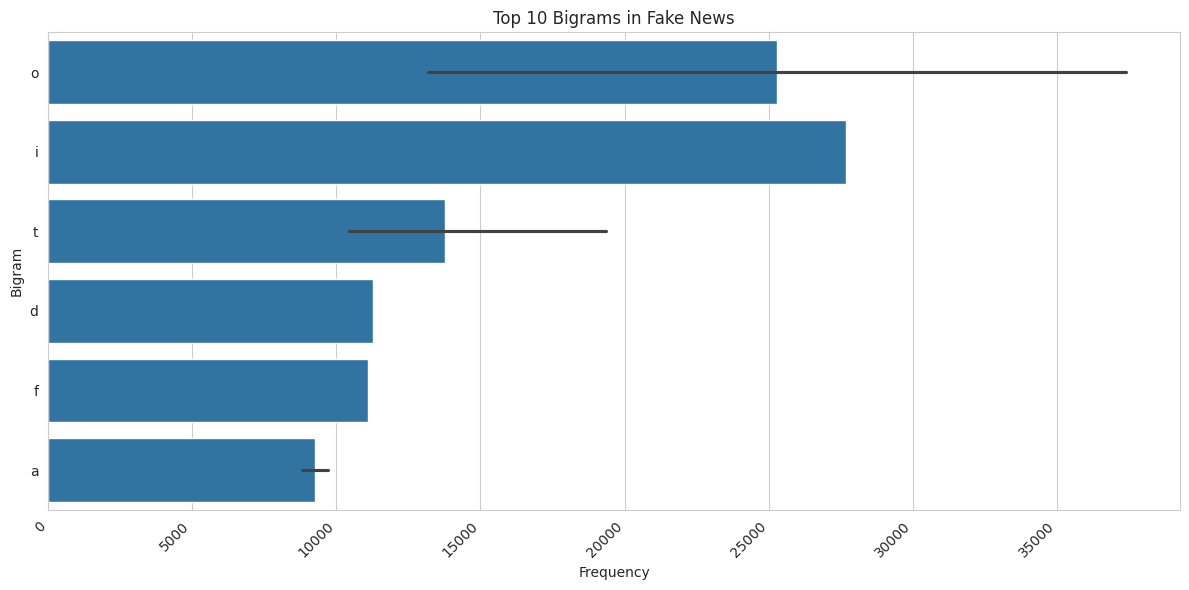

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
# Get top 10 bigrams using the get_top_ngrams function
top_10_bigrams_fake = get_top_ngrams(fake_news_texts, 2, 10)

# Print the top 10 bigrams
print("Top 10 Bigrams in Fake News:")
for bigram, frequency in top_10_bigrams_fake:
    print(f"{bigram}: {frequency}")

# Prepare data for plotting
bigrams_fake = [bigram[0] for bigram, frequency in top_10_bigrams_fake]
frequencies_fake = [frequency for bigram, frequency in top_10_bigrams_fake]

# Plot the top 10 bigrams as a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_fake, y=bigrams_fake)
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
the united states: 3963
the white house: 2913
one of the: 2805
the fact that: 1774
donald trump realdonaldtrump: 1299
according to the: 1273
as well as: 1242
of the united: 1213
out of the: 1185
the new york: 1109


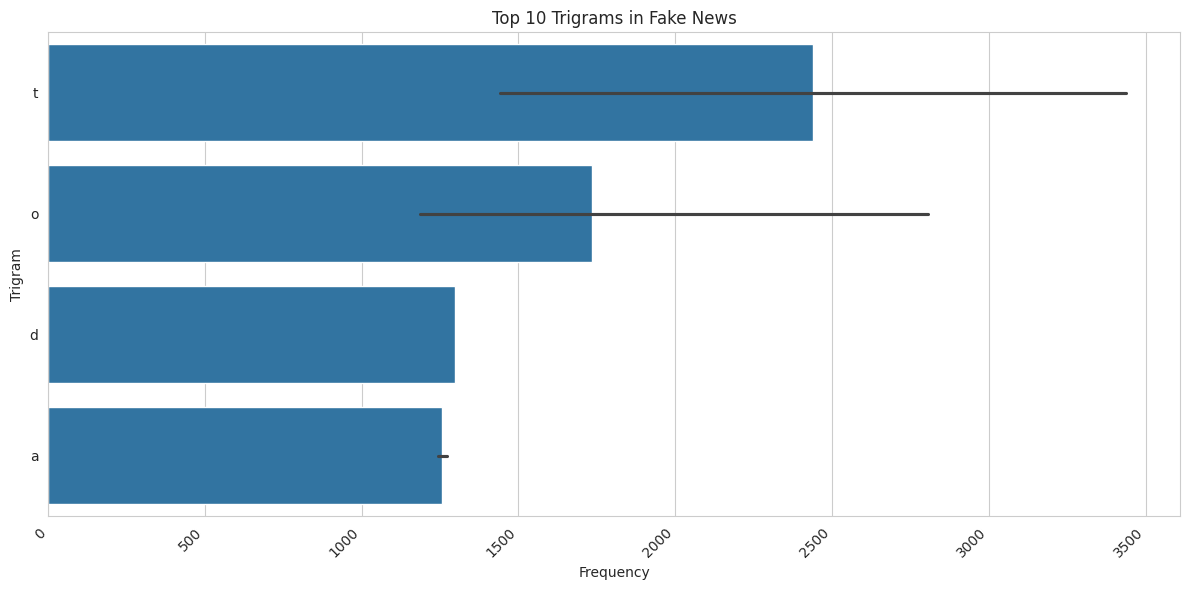

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Get top 10 trigrams using the get_top_ngrams function
top_10_trigrams_fake = get_top_ngrams(fake_news_texts, 3, 10)

# Print the top 10 trigrams
print("Top 10 Trigrams in Fake News:")
for trigram, frequency in top_10_trigrams_fake:
    print(f"{trigram}: {frequency}")

# Prepare data for plotting
trigrams_fake = [trigram[0] for trigram, frequency in top_10_trigrams_fake]
frequencies_fake = [frequency for trigram, frequency in top_10_trigrams_fake]

# Plot the top 10 trigrams as a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_fake, y=trigrams_fake)
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text
val_df['cleaned_text_len'] = val_df['cleaned_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')  # Replace NaN with empty string if any
val_df['lemmatized_text_len'] = val_df['lemmatized_text'].apply(len)

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

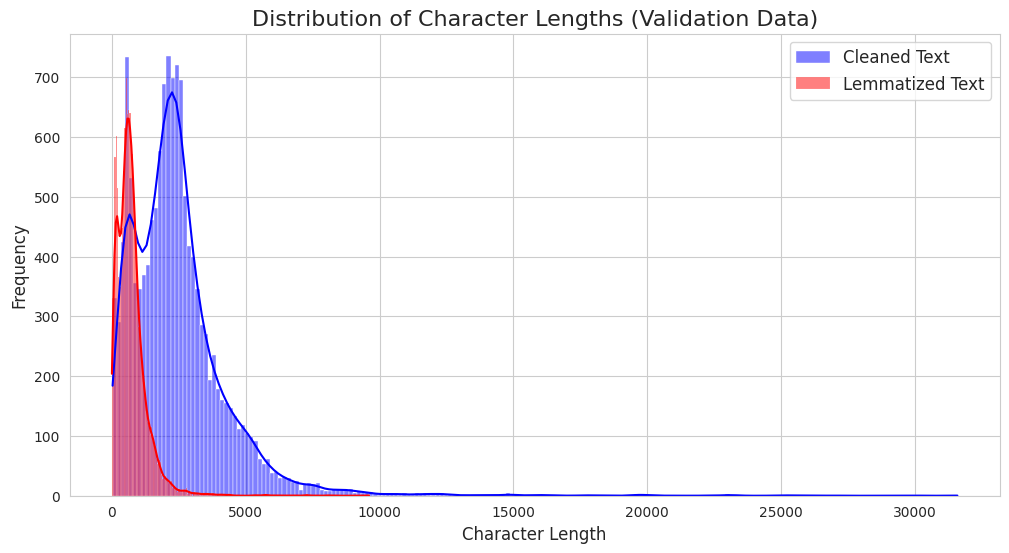

In [ ]:
# Create a histogram plot to visualise character lengths

# Set the style of the plot
sns.set_style('whitegrid')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Add histogram for cleaned news text
sns.histplot(val_df['cleaned_text_len'], ax=ax, label='Cleaned Text', color='blue', kde=True)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(val_df['lemmatized_text_len'], ax=ax, label='Lemmatized Text', color='red', kde=True)

# Set the title and labels
ax.set_title('Distribution of Character Lengths (Validation Data)', fontsize=16)
ax.set_xlabel('Character Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add a legend
ax.legend(fontsize=12)

# Display the plot
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

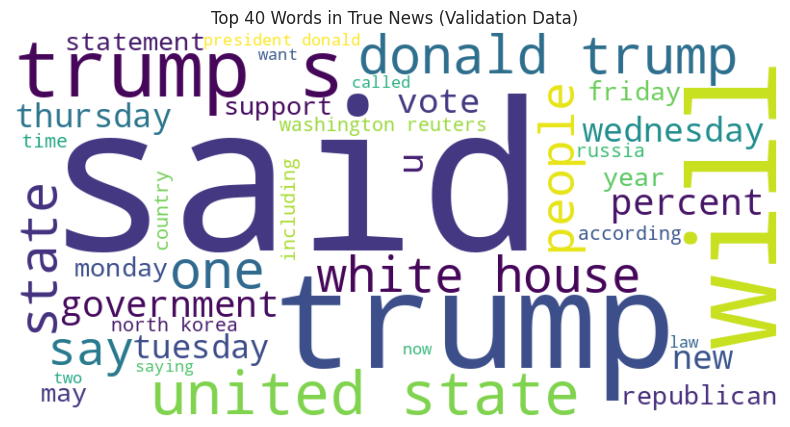

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

true_news_text_val = val_df[val_df['news_label'] == 1]['cleaned_text']

# Convert to string and handle non-string values
true_news_text_val = true_news_text_val.astype(str).str.cat(sep=' ')

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      max_words=40).generate(true_news_text_val)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Validation Data)')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

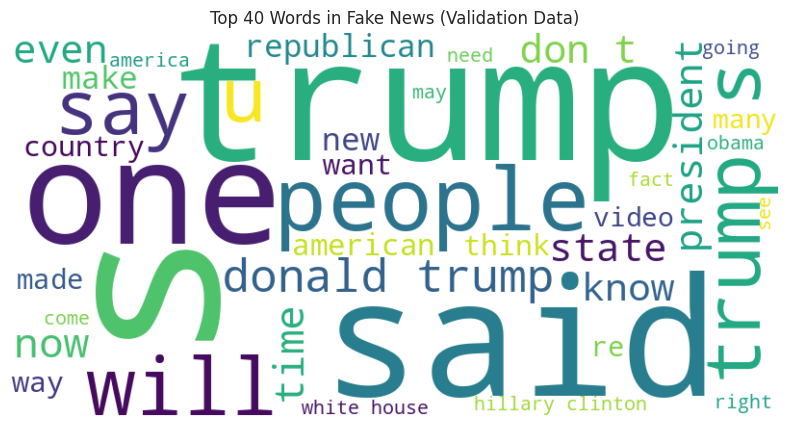

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Filter fake news in validation data
fake_news_text_val = val_df[val_df['news_label'] == 0]['cleaned_text']

# Convert to string and handle non-string values
fake_news_text_val = fake_news_text_val.astype(str).str.cat(sep=' ')

# Generate word cloud for Fake News
wordcloud_fake_val = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      max_words=40).generate(fake_news_text_val)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake_val, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Validation Data)')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams
#This is alredady writtern get_top_ngrams()

##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data
val_df['cleaned_text'] = val_df['cleaned_text'].fillna('')
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News (Validation Data):
the: 146949
to: 76693
of: 63320
in: 56463
and: 55087
on: 33680
said: 30252
that: 26597
for: 25119
trump: 18277


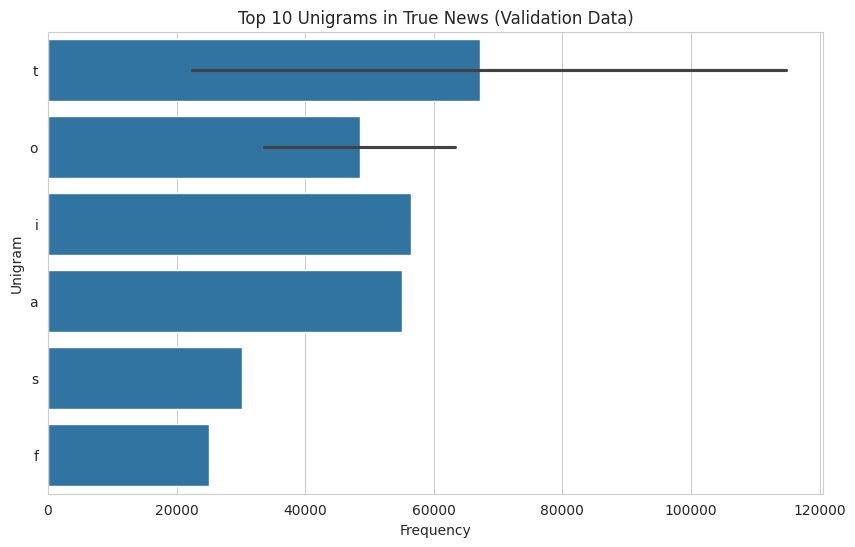

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Filter true news for cleaned text from validation data
true_news_texts_val = val_df[val_df['news_label'] == 1]['cleaned_text'].fillna("").tolist()

# Get top 10 unigrams using the get_top_ngrams function
top_10_unigrams_val = get_top_ngrams(true_news_texts_val, 1, 10)

# Print the top 10 unigrams
print("Top 10 Unigrams in True News (Validation Data):")
for unigram, frequency in top_10_unigrams_val:
    print(f"{unigram}: {frequency}")

# Prepare data for plotting
unigrams_val = [unigram[0] for unigram, frequency in top_10_unigrams_val]
frequencies_val = [frequency for unigram, frequency in top_10_unigrams_val]

# Plot the top 10 unigrams as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies_val, y=unigrams_val)
plt.title('Top 10 Unigrams in True News (Validation Data)')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News (Validation Data):
of the: 14471
in the: 12902
to the: 6886
on the: 5024
for the: 4719
the united: 4222
the us: 3912
said the: 3820
and the: 3669
united states: 3623


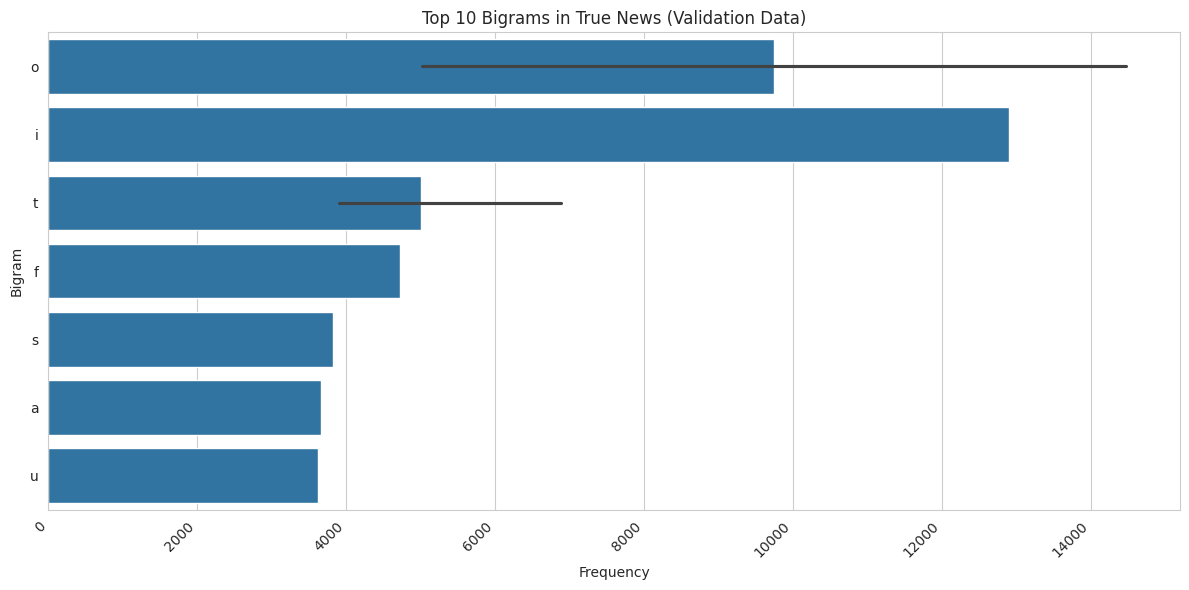

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Get top 10 bigrams using the get_top_ngrams function
top_10_bigrams_val = get_top_ngrams(true_news_texts_val, 2, 10)

# Print the top 10 bigrams
print("Top 10 Bigrams in True News (Validation Data):")
for bigram, frequency in top_10_bigrams_val:
    print(f"{bigram}: {frequency}")

# Prepare data for plotting
bigrams_val = [bigram[0] for bigram, frequency in top_10_bigrams_val]
frequencies_val = [frequency for bigram, frequency in top_10_bigrams_val]

# Plot the top 10 bigrams as a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_val, y=bigrams_val)
plt.title('Top 10 Bigrams in True News (Validation Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News (Validation Data):
the united states: 3552
president donald trump: 1800
the white house: 1700
said in statement: 1077
one of the: 895
president barack obama: 881
us president donald: 771
secretary of state: 726
house of representatives: 678
as well as: 643


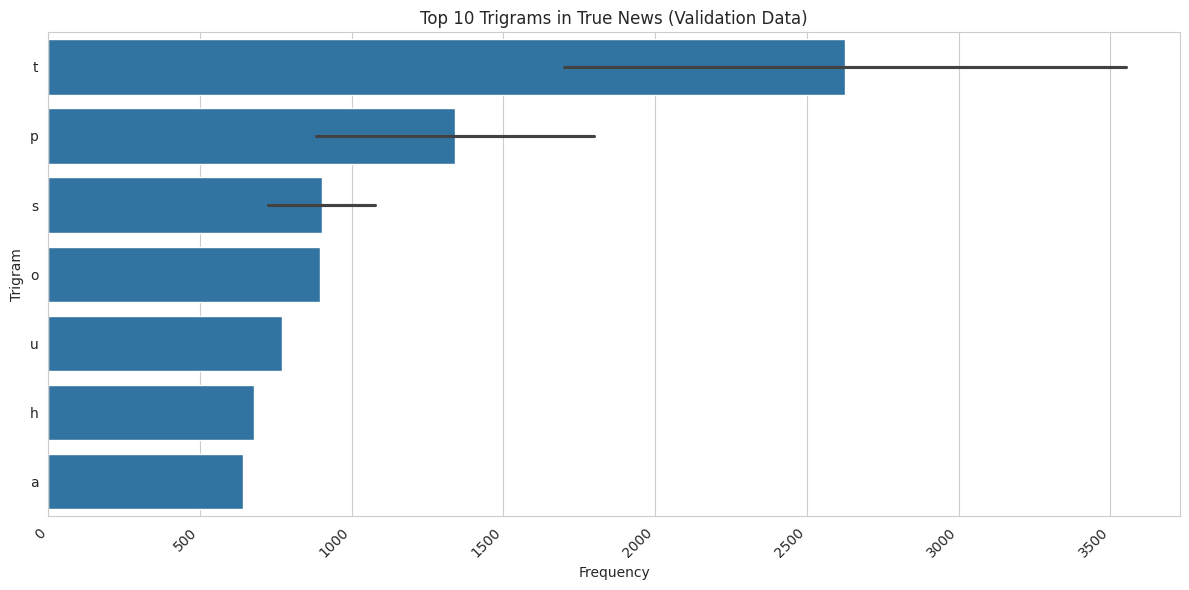

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Get top 10 trigrams using the get_top_ngrams function
top_10_trigrams_val = get_top_ngrams(true_news_texts_val, 3, 10)

# Print the top 10 trigrams
print("Top 10 Trigrams in True News (Validation Data):")
for trigram, frequency in top_10_trigrams_val:
    print(f"{trigram}: {frequency}")

# Prepare data for plotting
trigrams_val = [trigram[0] for trigram, frequency in top_10_trigrams_val]
frequencies_val = [frequency for trigram, frequency in top_10_trigrams_val]

# Plot the top 10 trigrams as a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_val, y=trigrams_val)
plt.title('Top 10 Trigrams in True News (Validation Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News (Validation Data):
the: 157074
to: 88274
of: 70904
and: 66880
in: 49497
that: 45286
is: 33810
for: 28525
on: 25105
trump: 24354


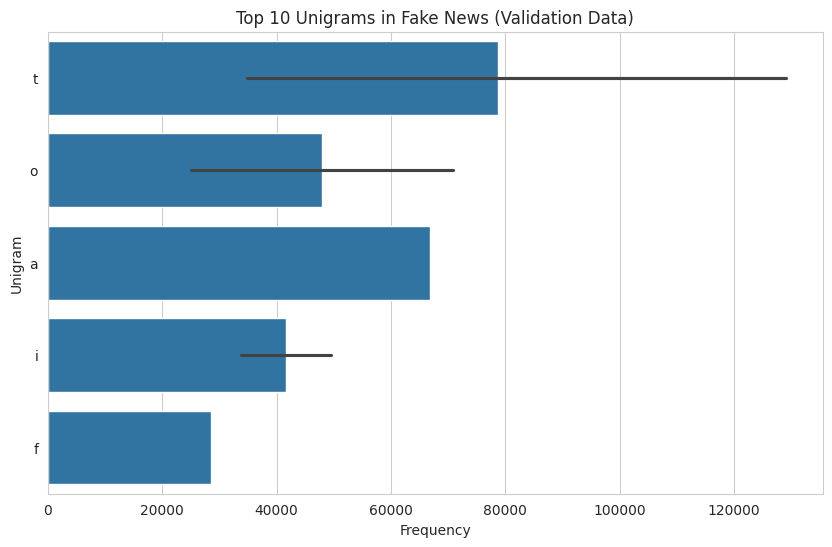

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# Filter fake news for cleaned text from validation data
fake_news_texts_val = val_df[val_df['news_label'] == 0]['cleaned_text'].fillna("").tolist()

# Get top 10 unigrams using the get_top_ngrams function
top_10_unigrams_fake_val = get_top_ngrams(fake_news_texts_val, 1, 10)

# Print the top 10 unigrams
print("Top 10 Unigrams in Fake News (Validation Data):")
for unigram, frequency in top_10_unigrams_fake_val:
    print(f"{unigram}: {frequency}")

# Prepare data for plotting
unigrams_fake_val = [unigram[0] for unigram, frequency in top_10_unigrams_fake_val]
frequencies_fake_val = [frequency for unigram, frequency in top_10_unigrams_fake_val]

# Plot the top 10 unigrams as a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_fake_val, y=unigrams_fake_val)
plt.title('Top 10 Unigrams in Fake News (Validation Data)')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News (Validation Data):
of the: 15929
in the: 11558
to the: 8218
on the: 5573
to be: 4953
for the: 4823
donald trump: 4636
that the: 4559
and the: 4214
at the: 3800


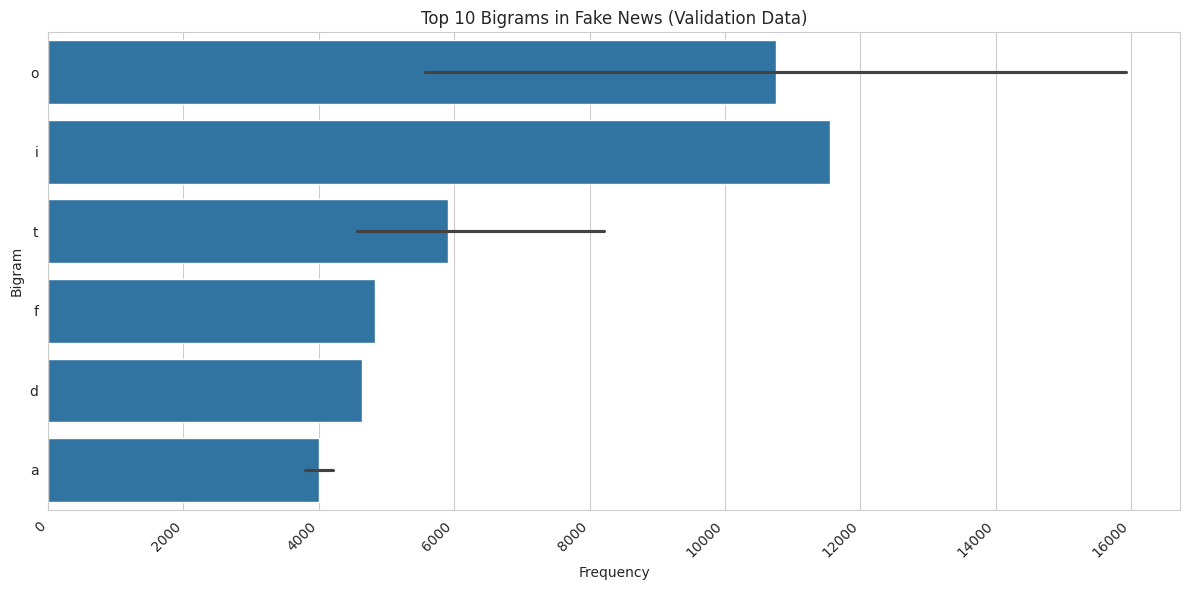

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Get top 10 bigrams using the get_top_ngrams function
top_10_bigrams_fake_val = get_top_ngrams(fake_news_texts_val, 2, 10)

# Print the top 10 bigrams
print("Top 10 Bigrams in Fake News (Validation Data):")
for bigram, frequency in top_10_bigrams_fake_val:
    print(f"{bigram}: {frequency}")

# Prepare data for plotting
bigrams_fake_val = [bigram[0] for bigram, frequency in top_10_bigrams_fake_val]
frequencies_fake_val = [frequency for bigram, frequency in top_10_bigrams_fake_val]

# Plot the top 10 bigrams as a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_fake_val, y=bigrams_fake_val)
plt.title('Top 10 Bigrams in Fake News (Validation Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News (Validation Data):
the united states: 1686
the white house: 1254
one of the: 1134
the fact that: 753
as well as: 551
of the united: 540
according to the: 502
out of the: 488
the new york: 487
new york times: 483


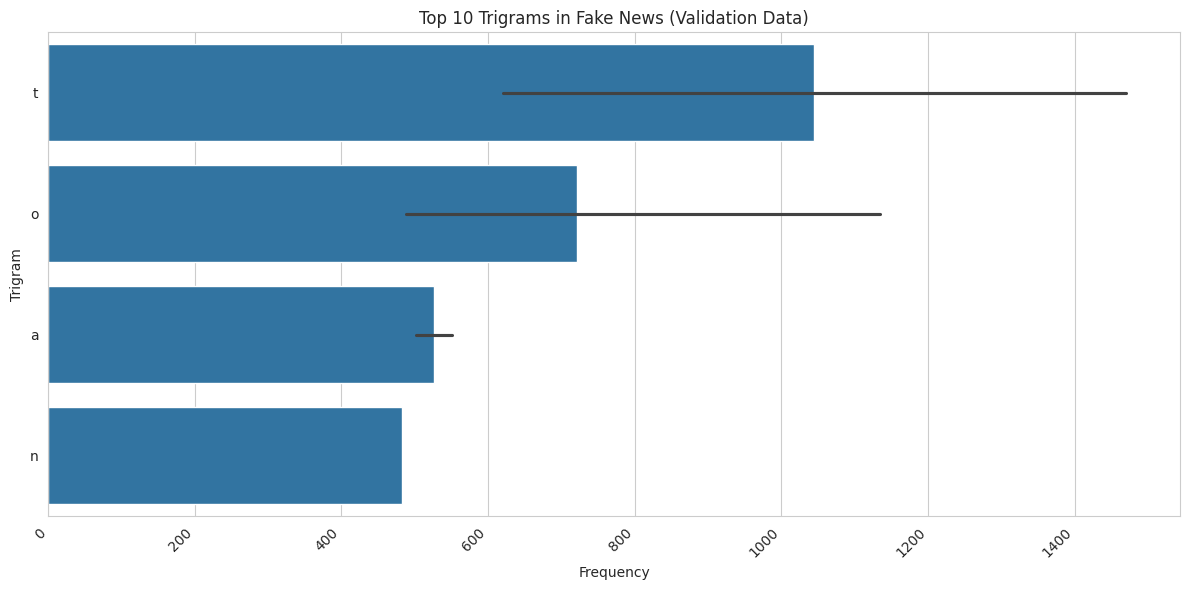

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

# Get top 10 trigrams using the get_top_ngrams function
top_10_trigrams_fake_val = get_top_ngrams(fake_news_texts_val, 3, 10)

# Print the top 10 trigrams
print("Top 10 Trigrams in Fake News (Validation Data):")
for trigram, frequency in top_10_trigrams_fake_val:
    print(f"{trigram}: {frequency}")

# Prepare data for plotting
trigrams_fake_val = [trigram[0] for trigram, frequency in top_10_trigrams_fake_val]
frequencies_fake_val = [frequency for trigram, frequency in top_10_trigrams_fake_val]

# Plot the top 10 trigrams as a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=frequencies_fake_val, y=trigrams_fake_val)
plt.title('Top 10 Trigrams in Fake News (Validation Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
!pip install gensim==4.3.2
import gensim.downloader as api

# Download the pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 21.5 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def get_word2vec_vectors(texts, model):
    """
    Extracts Word2Vec vectors for a list of texts.

    Args:
        texts (list): A list of text documents.
        model (gensim.models.Word2Vec): The pre-trained Word2Vec model.

    Returns:
        numpy.ndarray: A 2D array of Word2Vec vectors, where each row represents a document.
    """
    vectors = []
    for text in texts:
        tokens = text.split()  # Tokenize the text
        # Removed .wv from model[token]
        word_vectors = [model[token] for token in tokens if token in model]  # Get Word2Vec vectors for each token
        if word_vectors:
            document_vector = np.mean(word_vectors, axis=0)  # Calculate the average vector for the document
            vectors.append(document_vector)
        else:
            vectors.append(np.zeros(model.vector_size))  # Handle cases where no word vectors are found
    return np.array(vectors)



## Extract the target variable for the training data and validation data

# Extract vectors for training data
train_vectors = get_word2vec_vectors(train_df['cleaned_text'].fillna("").tolist(), word2vec_model)

# Extract vectors for validation data
val_vectors = get_word2vec_vectors(val_df['cleaned_text'].fillna("").tolist(), word2vec_model)

# Extract target variable for training data
train_labels = train_df['news_label'].values

# Extract target variable for validation data
val_labels = val_df['news_label'].values


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

## Train Logistic Regression model on training data
logreg_model.fit(train_vectors, train_labels)

## Predict on validation data
val_predictions_logreg = logreg_model.predict(val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics
accuracy = accuracy_score(val_labels, val_predictions_logreg)
precision = precision_score(val_labels, val_predictions_logreg)
recall = recall_score(val_labels, val_predictions_logreg)
f1 = f1_score(val_labels, val_predictions_logreg)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9592
Precision: 0.9508
Recall: 0.9651
F1-score: 0.9579


In [ ]:
# Classification Report

# Generate classification report
report = classification_report(val_labels, val_predictions_logreg)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6996
           1       0.95      0.97      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(train_vectors, train_labels)

## Predict on validation data
val_predictions_dt = dt_model.predict(val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics
accuracy_dt = accuracy_score(val_labels, val_predictions_dt)
precision_dt = precision_score(val_labels, val_predictions_dt)
recall_dt = recall_score(val_labels, val_predictions_dt)
f1_dt = f1_score(val_labels, val_predictions_dt)

# Print metrics
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - Precision: {precision_dt:.4f}")
print(f"Decision Tree - Recall: {recall_dt:.4f}")
print(f"Decision Tree - F1-score: {f1_dt:.4f}")

Decision Tree - Accuracy: 0.8946
Decision Tree - Precision: 0.9063
Decision Tree - Recall: 0.8707
Decision Tree - F1-score: 0.8881


In [ ]:
# Classification Report

# Generate classification report
report_dt = classification_report(val_labels, val_predictions_dt)

# Print the report
print("Decision Tree Classification Report:")
print(report_dt)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6996
           1       0.91      0.87      0.89      6474

    accuracy                           0.89     13470
   macro avg       0.90      0.89      0.89     13470
weighted avg       0.89      0.89      0.89     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
rf_model.fit(train_vectors, train_labels)

## Predict on validation data
val_predictions_rf = rf_model.predict(val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics
accuracy_rf = accuracy_score(val_labels, val_predictions_rf)
precision_rf = precision_score(val_labels, val_predictions_rf)
recall_rf = recall_score(val_labels, val_predictions_rf)
f1_rf = f1_score(val_labels, val_predictions_rf)

# Print metrics
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-score: {f1_rf:.4f}")

Random Forest - Accuracy: 0.9580
Random Forest - Precision: 0.9557
Random Forest - Recall: 0.9569
Random Forest - F1-score: 0.9563


In [68]:
# Classification Report

# Generate classification report
report_rf = classification_report(val_labels, val_predictions_rf)

# Print the report
print("Random Forest Classification Report:")
print(report_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6996
           1       0.96      0.96      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

**Patterns Observed in True and Fake News**

- **Textual Patterns:** Both true and fake news articles share high-frequency unigrams such as "the," "to," "of," and "trump." However, subtle differences exist: true news tends to use more standard grammatical forms and attribution phrases (e.g., "said," "said in statement"), and focuses on political reporting with references to official institutions and figures like "the united states," "president donald trump," and "the white house." Fake news, while similar in some trigrams, often includes more sensational or repetitive phrases such as "the fact that" and "donald trump realdonaldtrump," and may lack references to journalistic practices or official sources, indicating a different narrative style and possibly manipulative language.

- **N-gram Analysis:** True news bigrams and trigrams emphasize formal reporting and political context, while fake news n-grams show more frequent use of sensational or repetitive constructs and explicit mentions of social media handles, suggesting different methods of information framing and dissemination.

**How Semantic Classification Addressed the Problem**

- The approach used Word2Vec embeddings to capture the semantic meaning and context of news articles, representing each document as the average of its word vectors. This allowed the models to go beyond simple keyword matching and instead leverage the relationships and context within the text, improving the ability to distinguish between true and fake news.

- Semantic features helped the models recognize not just the presence of certain words, but also their usage patterns and contextual associations, which are crucial for identifying subtle differences in writing style and intent between true and fake news.

**Best Model Chosen and Evaluation Metric Prioritised**

- **Best Model:** Logistic Regression and Random Forest both performed exceptionally well, with F1-scores around 0.96. Decision Tree lagged behind with a lower F1-score. Logistic Regression and Random Forest are thus the preferred models for deployment due to their superior balance of precision and recall.

- **Evaluation Metric:** The F1-score was prioritised as the main evaluation metric. This is because it balances precision (avoiding false positives) and recall (catching as many fake news articles as possible), which is critical in fake news detection where both types of errors can have significant consequences.

**Assessment of the Approach and Its Impact**

- The pipeline demonstrated a robust and effective method for fake news detection, combining thorough data cleaning, advanced text preprocessing, insightful exploratory analysis, and powerful semantic feature extraction.

- By leveraging Word2Vec embeddings, the models achieved high accuracy and F1-scores, showing that semantic classification is highly effective for this task.

- The approach not only improved classification performance but also provided insights into the linguistic and narrative differences between true and fake news, which can inform further research and practical interventions in combating misinformation.

- Overall, the semantic classification approach, especially with models like Logistic Regression and Random Forest, offers a scalable and accurate solution for real-world fake news detection systems, with the F1-score serving as a reliable metric for model selection and evaluation.